In [126]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../'))
sys.path.append(work_path)
from helper.regrassion import *
from helper.plot import *
from helper.util import *
from helper.analysis import *
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

In [127]:
categories = ['insurance_validity','fuel_type','ownsership','transmission','manufacturing_year','seats']
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/회귀분석세미프로젝트/삭제된행확인.xlsx',info=False,categories=categories)
my_pretty_table(origin.head())


카테고리 정보
+-----------------------+----------------------+
|                       |   insurance_validity |
|-----------------------+----------------------|
| Comprehensive         |                  800 |
| Third Party insurance |                  208 |
| Third Party           |                   39 |
| Zero Dep              |                   34 |
+-----------------------+----------------------+
+--------+-------------+
|        |   fuel_type |
|--------+-------------|
| Petrol |         753 |
| Diesel |         317 |
| CNG    |          11 |
+--------+-------------+
+--------------+--------------+
|              |   ownsership |
|--------------+--------------|
| First Owner  |          908 |
| Second Owner |          158 |
| Third Owner  |           15 |
+--------------+--------------+
+-----------+----------------+
|           |   transmission |
|-----------+----------------|
| Manual    |            689 |
| Automatic |            392 |
+-----------+----------------+
+------+------

In [128]:
df = origin.copy()
df = df.drop('Unnamed: 0',axis=1)
df.columns

Index(['kms_driven', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)', 'price',
       'insurance_validity', 'fuel_type', 'seats', 'ownsership',
       'transmission', 'manufacturing_year'],
      dtype='object')

In [137]:
# 정규성 검정
my_normal_test(df[['kms_driven','mileage(kmpl)','engine(cc)','torque(Nm)','price']])

[normaltest-kms_driven] statistic: 26.724, p-value: 0.000, 정규성 충족 여부: False
[normaltest-mileage(kmpl)] statistic: 7.449, p-value: 0.024, 정규성 충족 여부: False
[normaltest-engine(cc)] statistic: 321.761, p-value: 0.000, 정규성 충족 여부: False
[normaltest-torque(Nm)] statistic: 122.891, p-value: 0.000, 정규성 충족 여부: False
[normaltest-price] statistic: 333.253, p-value: 0.000, 정규성 충족 여부: False


In [138]:
# 등분산성 검정
my_equal_var_test(df[['kms_driven','mileage(kmpl)','engine(cc)','torque(Nm)','price']])

Bartlett 검정: statistic: 41556.356, p-value: 0.000, 등분산성 충족 여부: False


In [139]:
# 중복값 제거
df2 = df[~df.duplicated()]
df2[df2.duplicated()]
df2 = df2.reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kms_driven          812 non-null    int64   
 1   mileage(kmpl)       812 non-null    float64 
 2   engine(cc)          812 non-null    int64   
 3   torque(Nm)          812 non-null    int64   
 4   price               812 non-null    float64 
 5   insurance_validity  812 non-null    category
 6   fuel_type           812 non-null    category
 7   seats               812 non-null    category
 8   ownsership          812 non-null    category
 9   transmission        812 non-null    category
 10  manufacturing_year  812 non-null    category
dtypes: category(6), float64(2), int64(3)
memory usage: 38.1 KB


In [ ]:
# Singular matrix 에러원인이 명목형 변수 사이의 강한 상관관계라고 판단

# 범주형 변수 간의 교차표 생성

# 카이제곱 검정을 통한 상관관계 분석

cross_tab = pd.crosstab(df2['insurance_validity'], df2['fuel_type'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-square Statistic: 20.370405554401138
p-value: 0.0023786902943188047
Degrees of Freedom: 6
Expected Frequencies Table:
[[5.87192118e+00 1.76891626e+02 4.13236453e+02]
 [3.74384236e-01 1.12783251e+01 2.63472906e+01]
 [1.45812808e+00 4.39261084e+01 1.02615764e+02]
 [2.95566502e-01 8.90394089e+00 2.08004926e+01]]


In [ ]:
cross_tab = pd.crosstab(df2['insurance_validity'], df2['seats'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 9.009844276112949
p-value: 0.7020893723482247
Degrees of Freedom: 12
Expected Frequencies Table:
[[2.93596059e+00 5.43152709e+02 3.66995074e+00 4.55073892e+01
  7.33990148e-01]
 [1.87192118e-01 3.46305419e+01 2.33990148e-01 2.90147783e+00
  4.67980296e-02]
 [7.29064039e-01 1.34876847e+02 9.11330049e-01 1.13004926e+01
  1.82266010e-01]
 [1.47783251e-01 2.73399015e+01 1.84729064e-01 2.29064039e+00
  3.69458128e-02]]


In [ ]:
cross_tab = pd.crosstab(df2['insurance_validity'], df2['ownsership'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 33.491286907363566
p-value: 8.433151263554849e-06
Degrees of Freedom: 6
Expected Frequencies Table:
[[5.03517241e+02 8.29408867e+01 9.54187192e+00]
 [3.21034483e+01 5.28817734e+00 6.08374384e-01]
 [1.25034483e+02 2.05960591e+01 2.36945813e+00]
 [2.53448276e+01 4.17487685e+00 4.80295567e-01]]


In [ ]:
cross_tab = pd.crosstab(df2['insurance_validity'], df2['transmission'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 7.446570537029604
p-value: 0.05894729321649752
Degrees of Freedom: 3
Expected Frequencies Table:
[[206.25123153 389.74876847]
 [ 13.15024631  24.84975369]
 [ 51.21674877  96.78325123]
 [ 10.3817734   19.6182266 ]]


In [ ]:
cross_tab = pd.crosstab(df2['insurance_validity'], df2['manufacturing_year'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 67.92958018747265
p-value: 0.015196079896350332
Degrees of Freedom: 45
Expected Frequencies Table:
[[7.33990148e-01 2.20197044e+00 5.13793103e+00 8.07389163e+00
  1.76157635e+01 2.12857143e+01 4.47733990e+01 5.50492611e+01
  6.23891626e+01 8.14729064e+01 1.07162562e+02 7.56009852e+01
  3.96354680e+01 4.18374384e+01 2.49556650e+01 8.07389163e+00]
 [4.67980296e-02 1.40394089e-01 3.27586207e-01 5.14778325e-01
  1.12315271e+00 1.35714286e+00 2.85467980e+00 3.50985222e+00
  3.97783251e+00 5.19458128e+00 6.83251232e+00 4.82019704e+00
  2.52709360e+00 2.66748768e+00 1.59113300e+00 5.14778325e-01]
 [1.82266010e-01 5.46798030e-01 1.27586207e+00 2.00492611e+00
  4.37438424e+00 5.28571429e+00 1.11182266e+01 1.36699507e+01
  1.54926108e+01 2.02315271e+01 2.66108374e+01 1.87733990e+01
  9.84236453e+00 1.03891626e+01 6.19704433e+00 2.00492611e+00]
 [3.69458128e-02 1.10837438e-01 2.58620690e-01 4.06403941e-01
  8.86699507e-01 1.07142857e+00 2.25369458e+00 2.77093596e+00
  3.1403

In [ ]:
cross_tab = pd.crosstab(df2['fuel_type'], df2['ownsership'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 5.874675933818763
p-value: 0.20870508191386494
Degrees of Freedom: 4
Expected Frequencies Table:
[[6.75862069e+00 1.11330049e+00 1.28078818e-01]
 [2.03603448e+02 3.35381773e+01 3.85837438e+00]
 [4.75637931e+02 7.83485222e+01 9.01354680e+00]]


In [ ]:
cross_tab = pd.crosstab(df2['fuel_type'], df2['transmission'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 16.685158638071442
p-value: 0.0002381572664678483
Degrees of Freedom: 2
Expected Frequencies Table:
[[  2.76847291   5.23152709]
 [ 83.40024631 157.59975369]
 [194.83128079 368.16871921]]


In [ ]:
cross_tab = pd.crosstab(df2['fuel_type'], df2['manufacturing_year'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 68.92327416632966
p-value: 6.756347967584458e-05
Degrees of Freedom: 30
Expected Frequencies Table:
[[9.85221675e-03 2.95566502e-02 6.89655172e-02 1.08374384e-01
  2.36453202e-01 2.85714286e-01 6.00985222e-01 7.38916256e-01
  8.37438424e-01 1.09359606e+00 1.43842365e+00 1.01477833e+00
  5.32019704e-01 5.61576355e-01 3.34975369e-01 1.08374384e-01]
 [2.96798030e-01 8.90394089e-01 2.07758621e+00 3.26477833e+00
  7.12315271e+00 8.60714286e+00 1.81046798e+01 2.22598522e+01
  2.52278325e+01 3.29445813e+01 4.33325123e+01 3.05701970e+01
  1.60270936e+01 1.69174877e+01 1.00911330e+01 3.26477833e+00]
 [6.93349754e-01 2.08004926e+00 4.85344828e+00 7.62684729e+00
  1.66403941e+01 2.01071429e+01 4.22943350e+01 5.20012315e+01
  5.89347291e+01 7.69618227e+01 1.01229064e+02 7.14150246e+01
  3.74408867e+01 3.95209360e+01 2.35738916e+01 7.62684729e+00]]


In [ ]:
cross_tab = pd.crosstab(df2['fuel_type'], df2['seats'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 98.30531705842046
p-value: 9.473856707219256e-18
Degrees of Freedom: 8
Expected Frequencies Table:
[[3.94088670e-02 7.29064039e+00 4.92610837e-02 6.10837438e-01
  9.85221675e-03]
 [1.18719212e+00 2.19630542e+02 1.48399015e+00 1.84014778e+01
  2.96798030e-01]
 [2.77339901e+00 5.13078818e+02 3.46674877e+00 4.29876847e+01
  6.93349754e-01]]


In [ ]:
cross_tab = pd.crosstab(df2['ownsership'], df2['transmission'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 4.482376418245818
p-value: 0.10633208453461823
Degrees of Freedom: 2
Expected Frequencies Table:
[[237.39655172 448.60344828]
 [ 39.1046798   73.8953202 ]
 [  4.49876847   8.50123153]]


In [ ]:
cross_tab = pd.crosstab(df2['ownsership'], df2['manufacturing_year'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 123.14158606269507
p-value: 3.023232434589813e-13
Degrees of Freedom: 30
Expected Frequencies Table:
[[8.44827586e-01 2.53448276e+00 5.91379310e+00 9.29310345e+00
  2.02758621e+01 2.45000000e+01 5.15344828e+01 6.33620690e+01
  7.18103448e+01 9.37758621e+01 1.23344828e+02 8.70172414e+01
  4.56206897e+01 4.81551724e+01 2.87241379e+01 9.29310345e+00]
 [1.39162562e-01 4.17487685e-01 9.74137931e-01 1.53078818e+00
  3.33990148e+00 4.03571429e+00 8.48891626e+00 1.04371921e+01
  1.18288177e+01 1.54470443e+01 2.03177340e+01 1.43337438e+01
  7.51477833e+00 7.93226601e+00 4.73152709e+00 1.53078818e+00]
 [1.60098522e-02 4.80295567e-02 1.12068966e-01 1.76108374e-01
  3.84236453e-01 4.64285714e-01 9.76600985e-01 1.20073892e+00
  1.36083744e+00 1.77709360e+00 2.33743842e+00 1.64901478e+00
  8.64532020e-01 9.12561576e-01 5.44334975e-01 1.76108374e-01]]


In [ ]:
cross_tab = pd.crosstab(df2['ownsership'], df2['seats'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 8.928767494066626
p-value: 0.34834067590092155
Degrees of Freedom: 8
Expected Frequencies Table:
[[3.37931034e+00 6.25172414e+02 4.22413793e+00 5.23793103e+01
  8.44827586e-01]
 [5.56650246e-01 1.02980296e+02 6.95812808e-01 8.62807882e+00
  1.39162562e-01]
 [6.40394089e-02 1.18472906e+01 8.00492611e-02 9.92610837e-01
  1.60098522e-02]]


In [ ]:
cross_tab = pd.crosstab(df2['transmission'], df2['manufacturing_year'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 23.699921707138078
p-value: 0.07036771733647787
Degrees of Freedom: 15
Expected Frequencies Table:
[[ 0.34605911  1.03817734  2.42241379  3.80665025  8.30541872 10.03571429
  21.10960591 25.9544335  29.41502463 38.41256158 50.52463054 35.64408867
  18.68719212 19.72536946 11.76600985  3.80665025]
 [ 0.65394089  1.96182266  4.57758621  7.19334975 15.69458128 18.96428571
  39.89039409 49.0455665  55.58497537 72.58743842 95.47536946 67.35591133
  35.31280788 37.27463054 22.23399015  7.19334975]]


In [ ]:
cross_tab = pd.crosstab(df2['transmission'], df2['seats'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 15.438789391104505
p-value: 0.0038725391511141684
Degrees of Freedom: 4
Expected Frequencies Table:
[[1.38423645e+00 2.56083744e+02 1.73029557e+00 2.14556650e+01
  3.46059113e-01]
 [2.61576355e+00 4.83916256e+02 3.26970443e+00 4.05443350e+01
  6.53940887e-01]]


In [ ]:
cross_tab = pd.crosstab(df2['manufacturing_year'], df2['seats'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 83.36412252901818
p-value: 0.02471598346584154
Degrees of Freedom: 60
Expected Frequencies Table:
[[4.92610837e-03 9.11330049e-01 6.15763547e-03 7.63546798e-02
  1.23152709e-03]
 [1.47783251e-02 2.73399015e+00 1.84729064e-02 2.29064039e-01
  3.69458128e-03]
 [3.44827586e-02 6.37931034e+00 4.31034483e-02 5.34482759e-01
  8.62068966e-03]
 [5.41871921e-02 1.00246305e+01 6.77339901e-02 8.39901478e-01
  1.35467980e-02]
 [1.18226601e-01 2.18719212e+01 1.47783251e-01 1.83251232e+00
  2.95566502e-02]
 [1.42857143e-01 2.64285714e+01 1.78571429e-01 2.21428571e+00
  3.57142857e-02]
 [3.00492611e-01 5.55911330e+01 3.75615764e-01 4.65763547e+00
  7.51231527e-02]
 [3.69458128e-01 6.83497537e+01 4.61822660e-01 5.72660099e+00
  9.23645320e-02]
 [4.18719212e-01 7.74630542e+01 5.23399015e-01 6.49014778e+00
  1.04679803e-01]
 [5.46798030e-01 1.01157635e+02 6.83497537e-01 8.47536946e+00
  1.36699507e-01]
 [7.19211823e-01 1.33054187e+02 8.99014778e-01 1.11477833e+01
  1.79802956e-01]


In [ ]:
# 분산분석을 통한 명목변수와 종속변수 관계 파악

from helper.analysis import my_anova
categories = ['insurance_validity','seats','fuel_type','ownsership','transmission','manufacturing_year']

for c in categories:
    tmp = df2[[c, "price"]]
    my_anova(tmp, hue=c, target="price")

pingouin.anova
+----+--------------------+---------+------+---------+---------+-------------+----------+
|    | Source             |      SS |   DF |      MS |       F |       p-unc |      np2 |
|----+--------------------+---------+------+---------+---------+-------------+----------|
|  0 | insurance_validity | 598.201 |    3 |   199.4 | 5.59253 | 0.000847585 | 0.020342 |
|  1 | Within             |   28809 |  808 | 35.6547 |     nan |         nan |      nan |
+----+--------------------+---------+------+---------+---------+-------------+----------+

statsmodels.anova.anova_lm
+-----------------------+------+----------+-----------+---------+-------------+
|                       |   df |   sum_sq |   mean_sq |       F |      PR(>F) |
|-----------------------+------+----------+-----------+---------+-------------|
| C(insurance_validity) |    3 |  598.201 |     199.4 | 5.59253 | 0.000847585 |
| Residual              |  808 |    28809 |   35.6547 |     nan |         nan |
+----------------

> 분산분석, 상관분석 결과 서로 상관성이 높고, 통계적으로 유의하지 않은 변수 제거(insurance_validity','fuel_type','ownsership','seats')
> 
> 카테고리 타입 중 두 변수 남음
> 'transmission','manufacturing_year'

In [ ]:
df2 = df2.drop('ownsership',axis=1)


In [ ]:
# 종속변수 로그화

df2['price'] = np.log(df2['price'])
df2.head()


,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price,insurance_validity,fuel_type,seats,transmission,manufacturing_year
0,30615,17.40,999,9863,2.196113,Comprehensive,Petrol,5,Automatic,2020
1,24000,20.68,1995,188,3.167583,Comprehensive,Diesel,5,Automatic,2018
2,18378,16.50,1353,13808,2.607124,Comprehensive,Petrol,5,Manual,2019
3,44900,14.67,1798,17746,3.178054,Comprehensive,Petrol,5,Automatic,2019
4,42000,18.70,1199,887,1.695616,Third Party insurance,Petrol,5,Manual,2017


In [ ]:
# 연속형 변수만 가지고 회귀분석
df_con = df2[['kms_driven','mileage(kmpl)','engine(cc)','torque(Nm)','price']]
df_con.head()

,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price
0,30615,17.40,999,9863,2.196113
1,24000,20.68,1995,188,3.167583
2,18378,16.50,1353,13808,2.607124
3,44900,14.67,1798,17746,3.178054
4,42000,18.70,1199,887,1.695616


In [ ]:
std_df = my_standard_scaler(df_con, yname='price')
my_pretty_table(std_df.head())

+----+--------------+-----------------+--------------+--------------+---------+
|    |   kms_driven |   mileage(kmpl) |   engine(cc) |   torque(Nm) |   price |
|----+--------------+-----------------+--------------+--------------+---------|
|  0 |    -0.861821 |       -0.498266 |     -1.11442 |     0.891339 | 2.19611 |
|  1 |     -1.10822 |        0.496354 |      1.42083 |    -0.945554 | 3.16758 |
|  2 |     -1.31763 |        -0.77118 |    -0.213337 |      1.64034 | 2.60712 |
|  3 |    -0.329731 |        -1.32611 |      0.91938 |        2.388 | 3.17805 |
|  4 |    -0.437751 |       -0.104057 |    -0.605333 |    -0.812842 | 1.69562 |
+----+--------------+-----------------+--------------+--------------+---------+


In [ ]:
x_train, x_test, y_train, y_test = my_train_test_split(std_df, yname='price',test_size=0.2 )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((649, 4), (649,), (163, 4), (163,))

In [ ]:
my_linear_regrassion(x_train, y_train, x_test, y_test,use_plot=False,resid_test=False)

[회귀식]
price = -0.169 * kms_driven + 0.026 * mileage(kmpl) + 0.413 * engine(cc) + 0.128 * torque(Nm) + 1.955

[회귀분석 성능평가]
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|        |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 데이터 |       0.609218 |             0.28416 |             0.13522 |         0.367723 |                         17.0942 |               -7.2112 |
+--------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+

[선형회귀분석 결과보고]
+----+------------+---------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수      |   B(비표준화 

LinearRegression(n_jobs=-1)

c:\Users\Jihwan\Desktop\01Class\helper\plot.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=df, x=xname, hue=hue, palette=palette, order=sort)


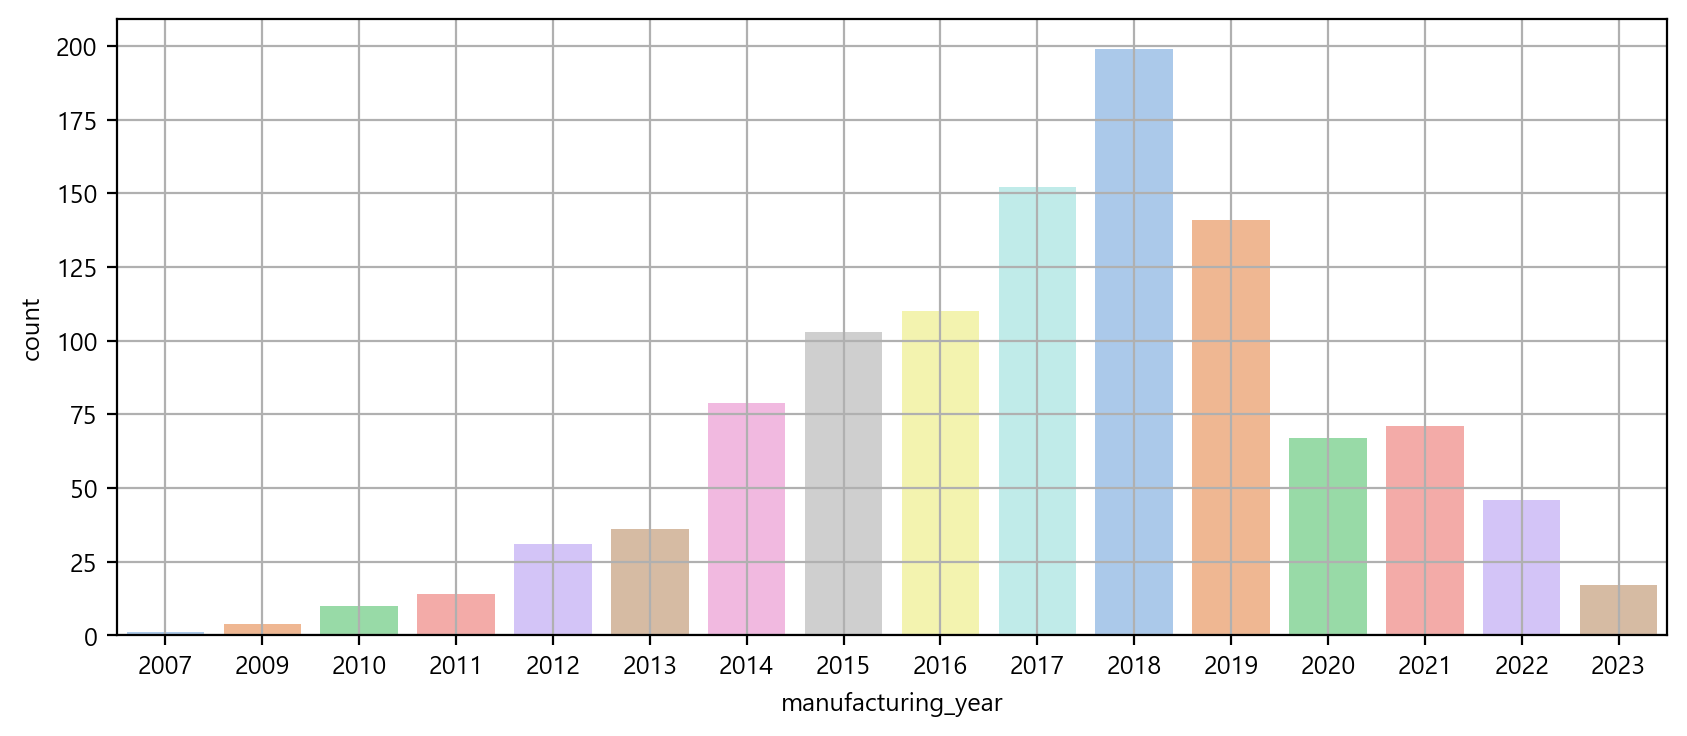

In [ ]:
my_countplot(df,xname = 'manufacturing_year')

> singular matrix 오류원인: manufacturing_year의 2007, 2009년의 sample 개수가 너무 적어서 
> train, test 분리를 못해서 오류남, 2007,2009년 데이터 제거

In [ ]:
df2 = df2[df2.manufacturing_year != 2007 ]
df3 = df2[df2.manufacturing_year != 2009 ]

In [ ]:
df3.to_excel('mana_2007-9제거.xlsx')